# 뉴럴 네트워크 이진분류
* diabetes dataset

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [138]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 데이터 준비

In [139]:
df = pd.read_csv("/content/drive/MyDrive/SKT FLY AI/2주차/ ML/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [140]:
X = df.drop('Outcome',axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [141]:
y = df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

### 스케일링

In [142]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42,stratify=y)

In [143]:
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 353 to 107
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    int64  
 2   BloodPressure             614 non-null    int64  
 3   SkinThickness             614 non-null    int64  
 4   Insulin                   614 non-null    int64  
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 43.2 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
353,1,90,62,12,43,27.2,0.580,24
711,5,126,78,27,22,29.6,0.439,40
373,2,105,58,40,94,34.9,0.225,25
46,1,146,56,0,0,29.7,0.564,29
682,0,95,64,39,105,44.6,0.366,22


In [144]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_train_s

array([[-0.85135507, -0.98013068, -0.40478372, ..., -0.60767846,
         0.31079384, -0.79216928],
       [ 0.35657564,  0.16144422,  0.46536842, ..., -0.30213902,
        -0.11643851,  0.56103382],
       [-0.5493724 , -0.50447447, -0.62232176, ...,  0.3725939 ,
        -0.76486207, -0.70759409],
       ...,
       [-0.85135507, -0.75815778,  0.03029235, ...,  0.77997981,
        -0.78607218, -0.28471812],
       [ 1.86648903, -0.31421198,  0.03029235, ..., -0.56948603,
        -1.01938346,  0.56103382],
       [ 0.05459296,  0.73223168, -0.62232176, ..., -0.31486983,
        -0.57700104,  0.30730824]])

In [145]:
y_train

353    0
711    0
373    0
46     0
682    0
      ..
451    1
113    0
556    0
667    1
107    0
Name: Outcome, Length: 614, dtype: int64

In [146]:
y_train = y_train.values

In [147]:
from tensorflow import keras
from keras import layers

### 모델 만들기


In [148]:
model = keras.Sequential([
    layers.Dense(units = 3,activation="relu",input_shape=(8,)), # shape이 8이라 인풋을 8로 설정
    layers.Dense(units = 2,activation="relu"),
    layers.Dense(units = 1,activation = 'sigmoid') # activation이 없으면 단순히 리니어 레그레이션, 이진 분류이기때문에 아웃은 0또는 1이라 1로 설정후,sigmoid를 통해 값 도출
])


In [149]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 3)                 27        
                                                                 
 dense_20 (Dense)            (None, 2)                 8         
                                                                 
 dense_21 (Dense)            (None, 1)                 3         
                                                                 
Total params: 38 (152.00 Byte)
Trainable params: 38 (152.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 학습

In [150]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics = ['accuracy']
)

In [151]:
EPOCHS = 100
BATCH_SIZE = 16

history = model.fit(
    X_train_s,y_train,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_split = 0.2, # data를 넣을 때 validation데이터로 acurracy를 떨어뜨릴 수 있도록 함.
    verbose = 1
)

Epoch 1/100
31/31 [==============================] - 1s 8ms/step - loss: 1.0004 - accuracy: 0.3157 - val_loss: 0.9284 - val_accuracy: 0.3496
Epoch 2/100
31/31 [==============================] - 0s 3ms/step - loss: 0.9268 - accuracy: 0.3564 - val_loss: 0.8615 - val_accuracy: 0.3902
Epoch 3/100
31/31 [==============================] - 0s 3ms/step - loss: 0.8685 - accuracy: 0.3931 - val_loss: 0.8110 - val_accuracy: 0.3821
Epoch 4/100
31/31 [==============================] - 0s 3ms/step - loss: 0.8217 - accuracy: 0.4318 - val_loss: 0.7702 - val_accuracy: 0.4390
Epoch 5/100
31/31 [==============================] - 0s 3ms/step - loss: 0.7841 - accuracy: 0.4644 - val_loss: 0.7356 - val_accuracy: 0.5041
Epoch 6/100
31/31 [==============================] - 0s 3ms/step - loss: 0.7554 - accuracy: 0.5092 - val_loss: 0.7099 - val_accuracy: 0.5610
Epoch 7/100
31/31 [==============================] - 0s 3ms/step - loss: 0.7324 - accuracy: 0.5519 - val_loss: 0.6905 - val_accuracy: 0.6179
Epoch 8/100
3

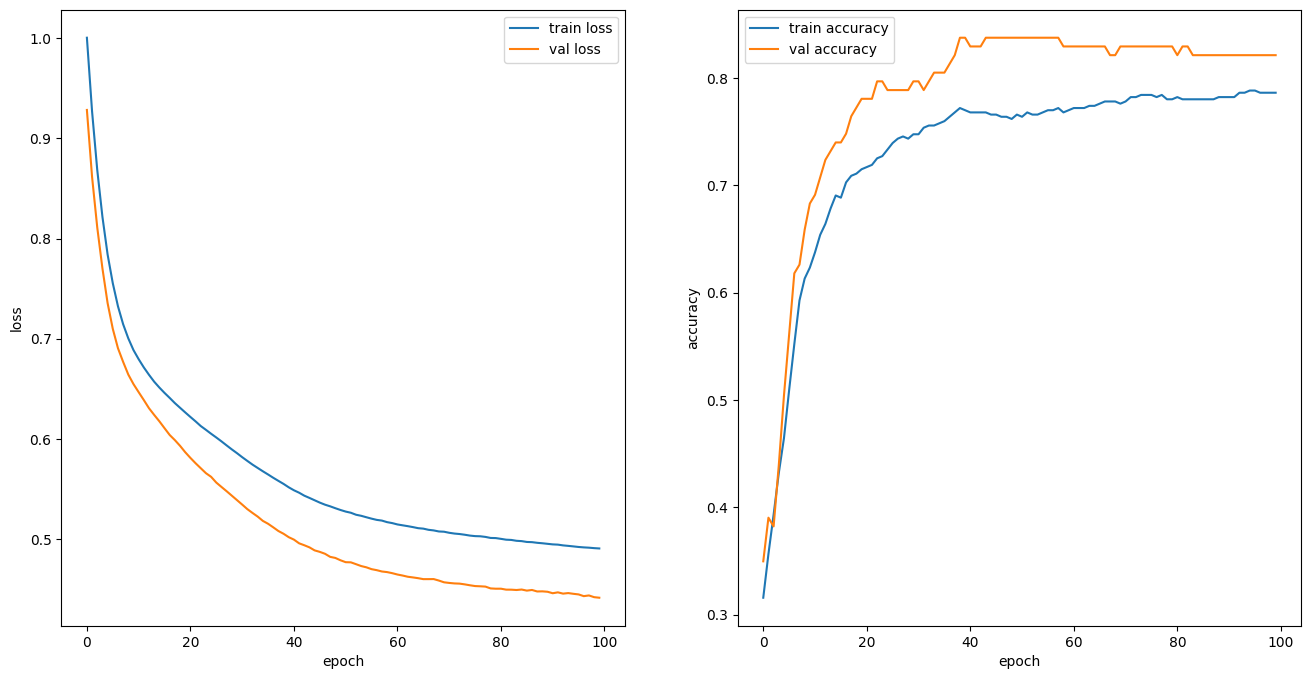

In [152]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1,2,1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.legend()
    plt.show()
plot_history(history)

### 평가

In [153]:
X_test_s = scaler.transform(X_test)
y_test = y_test.values

In [154]:
y_pred = model.predict(X_test_s)
y_pred.shape

5/5 [==============================] - 0s 3ms/step


(154, 1)

In [155]:
y_pred =y_pred.reshape(-1)
y_pred.shape

(154,)

In [156]:
y_pred #sigmoid를 거쳐 나온 값이라 0~1사이의 범주형 값임

array([0.70118046, 0.26719165, 0.25248617, 0.23531799, 0.1939913 ,
       0.1939913 , 0.38425493, 0.92914283, 0.1939913 , 0.7690726 ,
       0.3274807 , 0.72691095, 0.1939913 , 0.22428127, 0.34553683,
       0.36836198, 0.7223329 , 0.1939913 , 0.8363384 , 0.2605792 ,
       0.1939913 , 0.6788416 , 0.1939913 , 0.9386155 , 0.4896314 ,
       0.23302968, 0.5220066 , 0.1939913 , 0.3418823 , 0.1939913 ,
       0.1939913 , 0.1939913 , 0.46957493, 0.53279346, 0.8712699 ,
       0.1939913 , 0.30347165, 0.1939913 , 0.77457005, 0.4980703 ,
       0.28450218, 0.22490124, 0.1939913 , 0.3118819 , 0.1939913 ,
       0.36005157, 0.1939913 , 0.1939913 , 0.57456774, 0.6515448 ,
       0.6120556 , 0.87046635, 0.3476753 , 0.1939913 , 0.5093192 ,
       0.2660492 , 0.78698224, 0.1939913 , 0.7836494 , 0.1939913 ,
       0.8007027 , 0.1939913 , 0.1939913 , 0.91156787, 0.1939913 ,
       0.1939913 , 0.95587385, 0.1939913 , 0.22609322, 0.6322987 ,
       0.20485902, 0.1939913 , 0.3208906 , 0.36983696, 0.19399

In [157]:
y_test

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0])

In [158]:
y_pred1 = (y_pred >0.5).astype('int')
y_pred1

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [160]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

def print_metrics(y_test,y_pred):
  acc = accuracy_score(y_test,y_pred) # 정답값, 예측
  print(f'optimal_accuracy: {acc}')
  acc = recall_score(y_test,y_pred) # 정답값, 예측
  print(f'recall_score: {acc}')
  acc = precision_score(y_test,y_pred) # 정답값, 예측
  print(f'precision_score: {acc}')
print_metrics(y_test,y_pred1)

optimal_accuracy: 0.7272727272727273
recall_score: 0.5185185185185185
precision_score: 0.6363636363636364
